In [44]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import tensorflow as tf

import matplotlib.pyplot as plt

### Data load

In [4]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/sonar.csv'
df = pd.read_csv(url, header=None)
df.head()

### Data preprocessing

In [13]:
dataset = df.values
X = dataset[:, 0:60] # select input columns
Target = dataset[:, 60] # select the target column

e = LabelEncoder() # Instantiation
e.fit(Target) # Fitting
Y = e.transform(Target) # Converting string labels to numeric labels


### Data split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Base experiment

In [78]:
Inp = Input(X_train.shape[-1], )
Hidden1 = Dense(20, 'relu')(Inp)
Hidden2 = Dense(10, 'relu')(Hidden1)
Output = Dense(1, 'sigmoid')(Hidden2)

IrisMult = Model(Inp, Output)
IrisMult.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics='accuracy')

In [ ]:
history =IrisMult.fit(X_train.astype('float32'), Y_train, validation_data=(X_test.astype('float32'), Y_test), epochs=130, batch_size=10, shuffle=True)

### Plot losses over epochs

Text(0, 0.5, 'Loss')

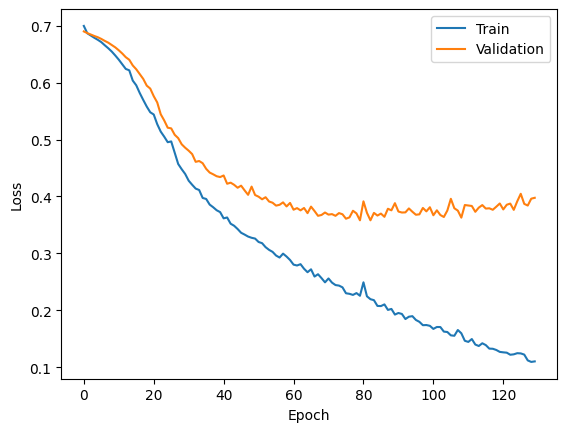

In [84]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')